# Ordinary, standardized and studentized residuals

## __<font color=blue>Ordinary residuals</font>__
---

When we fit a regression line to data, not every point falls perfectly on the line. The __residual__ is the difference between the actual value of _y_ and the predicted value of _y_

$$
 \epsilon_{i} = y_{i,observed} - y_{i,predicted}
$$

Visually, this is the vertical distance from a data point to the regression line.
```{image} ./Images/Residuals.png
:alt: Residuals
:width: 600px
:align: center
```

Residuals are important because they tell us how well our model fits the data. In a good model, residuals should:
- have a mean of 0
- be independent of each other
- be normally distributed
- have the same variance

If we plot residuals against the _x_-values, we don’t want to see any clear pattern. A pattern suggests the model is missing something. On the other hand, points with unusually large residuals compared to the rest of the data may be outliers.

## __<font color=blue>Standardized residuals</font>__
---

One challenge with residuals is that they are always on a different scale, depending on what the outcome variable is and how good the regression model is.

To make them easier to compare, we use __standardized residuals__ (also called __internally studentized residuals__), which are residuals divided by their standard deviation.

$$
 \epsilon'_{i} = \frac{\epsilon_{i}}{\sigma_{\epsilon} \sqrt{1-h_{ii}}}
$$

where $\sigma_{\epsilon}$ is the estimated standard deviation of the residuals (using $\sqrt{\frac{SSE}{n-p}}$, with _SSE_ the squared sum of residuals, _n_ the number of data points and _p_ the number of regression parameters including the intercept) and $h_{ii}$ is the leverage of the _ith_ observation (see further).

The standardized residual is approximately distributed as a Student’s t statistic.

## __<font color=blue>Studentized residuals</font>__
---

A more precise version is the __studentized residual__ (also called __externally studentized residuals__, __studentized deleted residuals__, __cross-validated residuals__ or __jackknife residuals__), which accounts for the influence of each point by leaving that point out when estimating the standard deviation:

$$
 \epsilon^{*}_{i} = \frac{\epsilon_{i}}{\sigma_{\epsilon(-i)} \sqrt{1-h_{ii}}} = \epsilon'_{i} \sqrt{\frac{n - p - 1}{n - p - {\epsilon'_{i}}^2}}
$$

where $\sigma_{\epsilon(-i)}$ is the estimated standard deviation of the residuals with the _ith_ observation deleted.

The studentized residual is distributed as a Student’s t statistic.

## __<font color=blue>Leverages</font>__
---

In <font color=red>linear regression</font>, fitted values $\hat{y}_{i}$ are a linear combination of the _n_ observed values $y_{1}$, $y_{2}$, ... $y_{n}$. 

$$
 \hat{y}_{1} = h_{11}y_{1} + h_{12}y_{2} + ... + h_{1n}y_{n}
$$
$$
 \hat{y}_{2} = h_{21}y_{1} + h_{22}y_{2} + ... + h_{2n}y_{n}
$$
$$
...
$$
$$
 \hat{y}_{n} = h_{n1}y_{1} + h_{n2}y_{2} + ... + h_{nn}y_{n}
$$

The individual elements $h_{ij}$ constitute the n x n __hat matrix, H__, with $\hat{y} = H y$.

So, $h_{ii}$, captures the extent to which $y_{i}$ can affect its predicted value $\hat{y}_{i}$. That is if $h_{ii}$ is small, then the observed response $y_{i}$ plays only a small role in the value of the predicted response $\hat{y}_{i}$. On the other hand, if $h_{ii}$ is large, then the observed response $y_{i}$ plays a large role in the value of the predicted response $\hat{y}_{i}$. It's for this reason that $h_{ii}$ is called __the leverage value__ (also called hat value).

Key properties of leverage values:
- The sum of all leverage values $h_{ii}$ equals _p_
- Each leverage value lies between 1/_n_ and 1
- The average leverage value is _p_/_n_. Values two or three times the average are considered noteworthy.

In <font color=red>nonlinear regression</font>, the fitted values depend on a nonlinear function of parameters (_e.g._ quadratic, exponential, logistic, sine). There’s no fixed hat matrix like in linear regression! Often, one ignores leverage and calculates "approximate" standardized residuals, but this is not correct! 

## __<font color=blue>Using residuals for outlier detection</font>__
---

If a standardized or studentized residual is __larger than about ± 2 or 3__ (approximately 2 or 3 standard deviations above or below the regression line), the point may be an outlier.

If you use this method to remove outliers, you need to mention it in your "Materials and Methods" section. For example, _"Studentized residuals were used to assess for outliers, with a cut-off score of ± 3."_ or _"Outliers were removed using standardized residuals (± 2.5)."_.

## __<font color=blue>Code for standardized and studentized residuals in linear regression</font>__
---

Below is a self-contained Python module using numpy and matplotlib.

It fits an ordinary least squares linear regression model (_e.g._ y = ax or y = ax +b) to (x,y) data using matrix algebra.

```{image} ./Images/Equations.png
:alt: Residuals
:width: 600px
:align: center
```

It computes
- fitted valyes
- regression parameters
- leverage values = hat values
- residuals
- internally studentized residuals = standardized residuals
- externally studentized residuals = studentized deleted residuals = cross-validated residuals = jackknife residuals

It plots the regression results with the outliers highlighted.

In [4]:
# Import the libraries needed

import matplotlib.pyplot as plt   # For creating visualizations and plots
import numpy as np                # For numerical computations and handling arrays

In [5]:
def add_intercept(X):
    """
    Add a column of ones to the input X to account for the intercept term in the regression model.
    If X is a 1D array, it reshapes it first to a column vector before horizontally stacking a column of ones to the left of X.
    
    Return: n x p matrix
    """
    X = np.asarray(X)                                 # Ensure X is a NumPy array
    if X.ndim == 1:                                   # If X is 1D (just a vector)...
        X = X.reshape(-1, 1)                          # ...reshape into a 2D column vector
    return np.hstack([np.ones((X.shape[0], 1)), X])   # Add a column of ones (intercept) on the left

def fit_ols(X, Y, add_const=True):
    """
    Fit a linear regression model using matrix algebra.
    
    Parameters:
    - X
    - Y
    - add_const, default = True. If True, a column of ones is added to X so that the regression includes an intercept term.
    If False, no column of ones is added, and the regression is forced through the origin.
    
    Return: a dictionary with fitted values (predicted y), regression coefficients, residuals, hat_diag (leverages), ssr (squared sum of residuals), sigma_r (estimated standard deviation of residuals)
    """
    X = np.asarray(X)          # Ensure X is a NumPy array
    Y = np.asarray(Y)          # Ensure Y is a NumPy array
    if add_const:              # If intercept term needed...
        X = add_intercept(X)   # ...use the add_intercept function
    n, p = X.shape             # Get number of observations (n) and parameters (p)

    # Compute regression coefficients (beta)
    XtX = X.T @ X                   # Compute XᵀX with transpose of X = .T and multiply = @
    XtX_inv = np.linalg.pinv(XtX)   # Compute (XᵀX)⁻¹, work with the pseudo-inverse of the matrix (in case matrix is singular)
    beta = XtX_inv @ X.T @ Y        # Compute (XᵀX)⁻¹XᵀY

    # Compute fitted values (y_hat) and residuals
    y_hat = X @ beta        # Compute predicted values from the model
    residuals = Y - y_hat   # Compute the difference between observed and predicted values

    # Compute hat matrix and take the leverages, i.e. the diagonal (hat_diag)
    hat_matrix = X @ XtX_inv @ X.T                      # Compute the hat matrix X(XᵀX)⁻¹Xᵀ
    hat_diag = np.clip(np.diag(hat_matrix), 0.0, 1.0)   # Select the diagonal and clip values to [0,1] to avoid numerical issues

    # Compute estimated standard deviation of residuals
    ssr = (residuals ** 2).sum()                                             # Compute sum of squared residuals
    dof = n - p                                                              # Define the degrees of freedom
    if dof <= 0:                                                             # If the degrees of freedom are 0 or negative...
        raise ValueError(f"n - p non-positive: n={n}, p={p}")                # ... raise an error
    else:
        sigma_r = np.sqrt(ssr / dof)                                         # Compute estimated standard deviation of residuals

    return {
        "y_predicted": y_hat,
        "beta": beta,
        "residuals": residuals,
        "leverages": hat_diag,
        "sigma_r": sigma_r,
        "n": n,
        "p": p,
        "ssr": ssr
    }

def studentized_residuals(X, Y, add_const=True):
    """
    Compute:
      - internally studentized residuals (sometimes called standardized residuals)
      - externally studentized residuals (somteimes called studentized deleted residuals or jackknife residuals)
    It needs the function "fit_ols"
    
    Returns: a dictionarry with internally and externally residuals
    """
    X = np.asarray(X)                          # Ensure X is a NumPy array
    y = np.asarray(Y)                          # Ensure Y is a NumPy array
    fit = fit_ols(X, Y, add_const=add_const)   # Fit OLS model and extract results

    e = fit["residuals"]       # Ordinary residuals
    h = fit["leverages"]       # Leverages
    sigma = fit["sigma_r"]     # Estimated standard error of residuals
    n = fit["n"]               # Sample size
    p = fit["p"]               # Number of parameters (intercept included)
    ssr = fit["ssr"]           # Squared sum of residuals

    # Internally-studentized residuals:
    denom_internal = sigma * np.sqrt(np.maximum(1e-15, 1.0 - h))  # Avoid division by zero
    r_internal = e / denom_internal                               # rᵢ = eᵢ / (σ√(1-hᵢ))

    # Externally-studentized residuals:
    dof_external = n - p - 1                                               # Degrees of freedom for externally studentized residuals
    denom_external = np.maximum(1e-15, n - p - r_internal**2)              # Avoid division by zero
    if dof_external <= 0:                                                  # If the degrees of freedom are 0 or negative...
        raise ValueError(f"n - p - 1 non-positive: n={n}, p={p}")          # ... raise an error
    else:
        t_external = r_internal * np.sqrt(dof_external / denom_external)   # tᵢ = rᵢ √((n-p-1) / (n-p-rᵢ²))

    return {
        "r_internal": r_internal,
        "t_external": t_external
    }

def plot_regression_results_with_outliers(x, y, fit, stud_res, cutoff=2, title="Dataset"):
    """
    This function shows scatter plot, regression line, residuals, and standardized/studentized residuals.
    Points with |residual| > cutoff (default=2) are highlighted as outliers.

    Returns four graphs
    """
    y_hat = fit["y_predicted"]            # Fitted values (predicted y)
    residuals = fit["residuals"]          # Ordinary residuals
    r_internal = stud_res["r_internal"]   # Internally studentized residuals
    t_external = stud_res["t_external"]   # Externally studentized residuals

    # Identify outliers based on absolute value > cutoff
    outliers_internal = np.where(np.abs(r_internal) > cutoff)[0]
    outliers_external = np.where(np.abs(t_external) > cutoff)[0]
    
    # Extract regression coefficients
    beta = fit["beta"]
    intercept = beta[0]
    slope = beta[1]
    
    # Create a 2x2 grid of subplots
    fig, axs = plt.subplots(2, 2, figsize=(12, 10))

    # 1. Scatter plot of data with regression line
    axs[0,0].scatter(x, y, color="blue", label="Data")
    axs[0,0].scatter(x[outliers_external], y[outliers_external], color="red", s=100, label="Outliers")
    axs[0,0].plot(x, y_hat, color="red", linestyle='--', label="Regression line")
    axs[0,0].set_title("Scatterplot with Regression Line")
    axs[0,0].set_xlabel("x")
    axs[0,0].set_ylabel("y")
    axs[0,0].legend()
    # Display fitted parameters and residual standard deviation on plot
    param_text = f"Intercept = {intercept:.2f}\nSlope = {slope:.2f}"
    axs[0,0].text(0.05, 0.95, param_text, transform=axs[0,0].transAxes, fontsize=10,
    verticalalignment='top', bbox=dict(boxstyle="round", facecolor="wheat", alpha=0.5))

    # 2. Residuals vs x
    axs[0,1].scatter(x, residuals, color="green")
    axs[0,1].scatter(x[outliers_external], residuals[outliers_external], color="red", s=100, label="Outliers")
    axs[0,1].axhline(0, color="black", linestyle="--")
    axs[0,1].set_title("Residuals vs x")
    axs[0,1].set_xlabel("x")
    axs[0,1].set_ylabel("Residuals")
    axs[0,1].legend()

    # 3. Internally studentized residuals vs x
    axs[1,0].scatter(x, r_internal, color="purple")
    axs[1,0].scatter(x[outliers_internal], r_internal[outliers_internal], color="red", s=100, label="Outliers")
    axs[1,0].axhline(0, color="black", linestyle="--")
    axs[1,0].axhline(2, color="red", linestyle="--")
    axs[1,0].axhline(-2, color="red", linestyle="--")
    axs[1,0].set_title("Internally Studentized Residuals vs x")
    axs[1,0].set_xlabel("x")
    axs[1,0].set_ylabel("Internally Studentized Residuals")
    axs[1,0].legend()

    # 4. Externally studentized residuals vs x
    axs[1,1].scatter(x, t_external, color="orange")
    axs[1,1].scatter(x[outliers_external], t_external[outliers_external], color="red", s=100, label="Outliers")
    axs[1,1].axhline(0, color="black", linestyle="--")
    axs[1,1].axhline(2, color="red", linestyle="--")
    axs[1,1].axhline(-2, color="red", linestyle="--")
    axs[1,1].set_title("Externally Studentized Residuals vs x")
    axs[1,1].set_xlabel("x")
    axs[1,1].set_ylabel("Externally Studentized Residuals")
    axs[1,1].legend()

    plt.tight_layout()
    plt.show()

## __<font color=blue>Example 1</font>__
---

In [7]:
# Define example dataset

# Create two 1D NumPy arrays with sample x and y values (our dataset)

x1 = np.array([
    0.1, 0.45401, 1.09765, 1.27936, 2.20611, 2.50064, 
    3.0403, 3.23583, 4.45308, 4.1699, 5.28474, 5.59238, 
    5.92091, 6.66066, 6.79953, 7.97943, 8.41536, 8.71607, 
    8.70156, 9.16463, 4
])

y1 = np.array([
    -0.0716, 4.1673, 6.5703, 13.815, 11.4501, 12.9554, 
    20.1575, 17.5633, 26.0317, 22.7573, 26.303, 30.6885, 
    33.9402, 30.9228, 34.11, 44.4536, 46.5022, 50.0568, 
    46.5475, 45.7762, 40
])

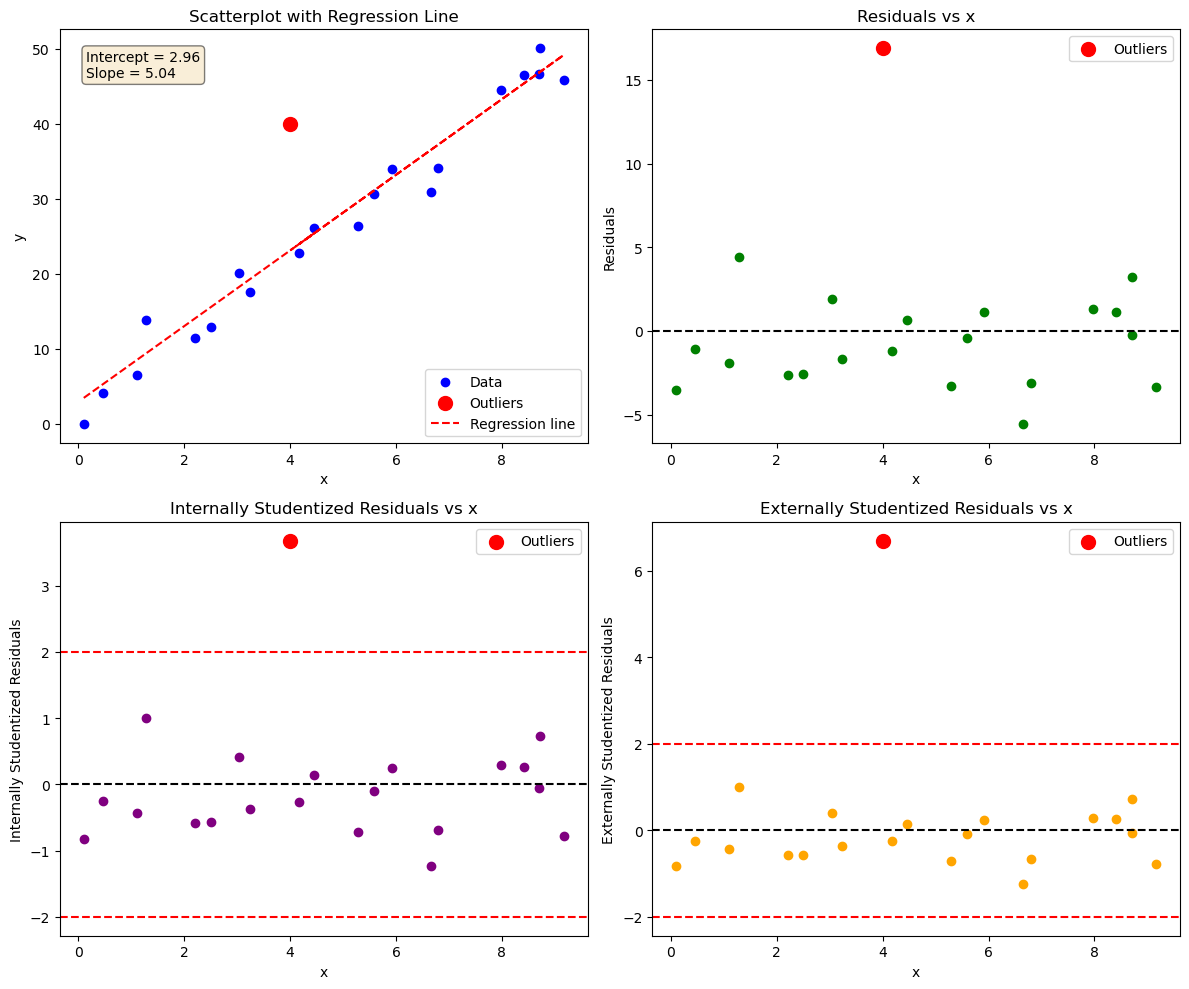

In [8]:
# Apply and plot for dataset 1
fit1 = fit_ols(x1, y1)
stud_res1 = studentized_residuals(x1, y1)
plot_regression_results_with_outliers(x1, y1, fit1, stud_res1, title="Dataset 1")

Data point (4,40) does not follow the general trend of the rest of the data, it's standardized and studentized residuals are > 2. It can be considered an outlier.

It does not have an extreme x-value, so it will not influence the fit too much.

Try fitting the data without outlier. Do the regression parameters change?

## __<font color=blue>Example 2</font>__
---

In [11]:
# Define example dataset

# Create two 1D NumPy arrays with sample x and y values (our dataset)
x2 = np.array([
    0.1, 0.45401, 1.09765, 1.27936, 2.20611, 2.50064, 
    3.0403, 3.23583, 4.45308, 4.1699, 5.28474, 5.59238, 
    5.92091, 6.66066, 6.79953, 7.97943, 8.41536, 8.71607, 
    8.70156, 9.16463, 13
])

y2 = np.array([
    -0.0716, 4.1673, 6.5703, 13.815, 11.4501, 12.9554, 
    20.1575, 17.5633, 26.0317, 22.7573, 26.303, 30.6885, 
    33.9402, 30.9228, 34.11, 44.4536, 46.5022, 50.0568, 
    46.5475, 45.7762, 15
])

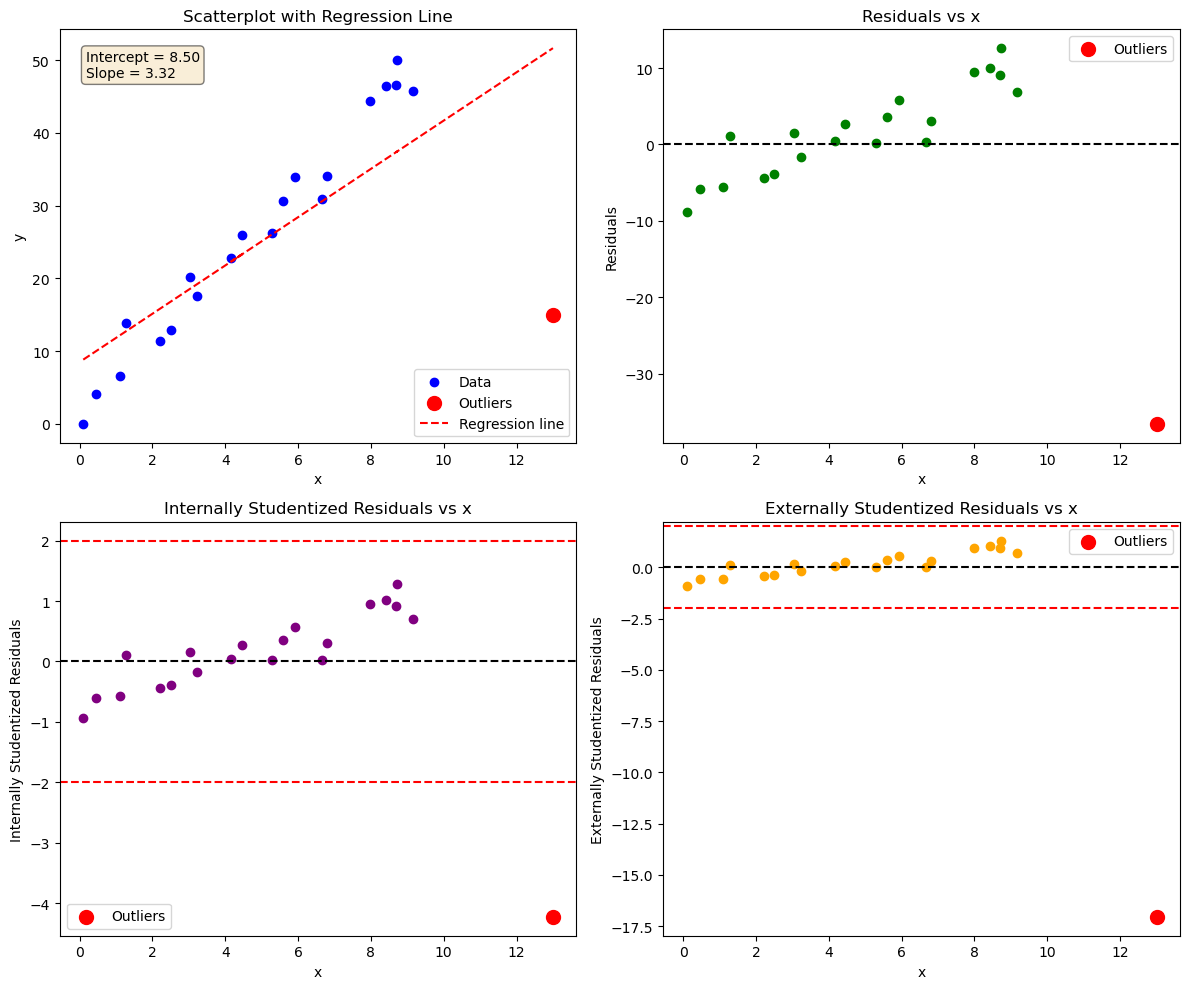

In [12]:
# Apply analysis and plot for dataset 2
fit2 = fit_ols(x2, y2)
stud_res2 = studentized_residuals(x2, y2)
plot_regression_results_with_outliers(x2, y2, fit2, stud_res2, title="Dataset 2")

Data point (13,15) does not follow the general trend of the rest of the data, it's standardized and studentized residuals are > 2. It can be considered an outlier.

It also has an extreme x-value, it influences the fit a lot. That’s why the residuals show a trend rather than being randomly scattered.

Try fitting the data without outlier. Do the regression parameters change?

## __<font color=blue>Resources</font>__
---

- The two example datasets are from "Lesson 11: Influential Points" from "STAT 501" from PennState, Eberly College of Science. Available [here](https://online.stat.psu.edu/stat501/lesson/11).
- "STAT22400" Lecture notes from The University of Chicago, Department of Statistics. Available [here](https://www.stat.uchicago.edu/~yibi/teaching/stat224/).

## __<font color=blue>Note</font>__
---

This code contains simplifications and is intended for educational purposes! For more options, see for example the module [statsmodels](https://www.statsmodels.org/dev/index.html).